## Linear Model

## 1. Linear Regression(수치예측)

In [2]:
from sklearn.linear_model import LinearRegression
from sklearn import datasets
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
diab = datasets.load_diabetes()

In [4]:
test = pd.DataFrame(diab.data, columns=diab.feature_names)

In [5]:
test1 = pd.DataFrame(diab.target, columns=['target'])

In [6]:
test.head(3)

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930


In [7]:
test2 = pd.concat([test,test1],axis=1)

In [8]:
test2.head(3)

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0


In [9]:
print(diab.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - Age
      - Sex
      - Body mass index
      - Average blood pressure
      - S1
      - S2
      - S3
      - S4
      - S5
      - S6

Note: Each of these 10 feature variables have been mean centered and scaled by the standard deviation times `n_samples` (i.e. the sum of squares of each column totals 1).

Source URL:
https://www4.stat.ncsu.edu/~boos/var.select/diabetes.html

For more information see:
Bra

In [10]:
diab.data[0]

array([ 0.03807591,  0.05068012,  0.06169621,  0.02187235, -0.0442235 ,
       -0.03482076, -0.04340085, -0.00259226,  0.01990842, -0.01764613])

In [11]:
diab.target[0]

151.0

In [12]:
# np.newaxis : 축을 유지하면서 가지고 온다
diab_X = diab.data[:,np.newaxis,3]
len(diab_X)

442

In [13]:
diab_X.shape

(442, 1)

In [15]:
diab_X_train = diab_X[:-20]
diab_X_test = diab_X[-20:]

diab_y_train = diab.target[:-20]
diab_y_test = diab.target[-20:]

In [16]:
len(diab_X_train)

422

In [17]:
lr = LinearRegression()
lr.fit(diab_X_train, diab_y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [18]:
diab_pred = lr.predict(diab_X_test)

In [19]:
print('train data accuracy: {:.3f}'.format(lr.score(diab_X_train, diab_y_train)))
print('test data accuracy: {:.3f}'.format(lr.score(diab_X_test, diab_y_test)))

train data accuracy: 0.192
test data accuracy: 0.160


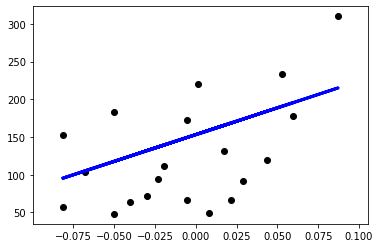

In [20]:
plt.scatter(diab_X_test, diab_y_test , color='k')
plt.plot(diab_X_test, diab_pred, color = 'b', linewidth=3)

plt.show()

## multiple linear

In [21]:
X = diab.data
y= diab.target

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.1, random_state=0)

In [22]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [23]:
print('train data accuracy: {:.3f}'.format(lr.score(X_train, y_train)))
print('test data accuracy: {:.3f}'.format(lr.score(X_test, y_test)))

train data accuracy: 0.530
test data accuracy: 0.357


In [24]:
lr.predict(X_test)

array([234.93809577, 247.05279947, 162.13588198, 118.09781212,
       187.86146311, 253.15492656, 113.85847925, 188.52994169,
       143.57100178, 229.21768838, 163.23404166, 176.10993482,
       103.82605781,  85.96868511, 242.33454283,  88.04986769,
       155.8393069 ,  66.71771541,  98.02861142, 221.88665987,
       190.58912486, 157.22723483, 160.82573719, 150.11089861,
       193.31230928, 168.73810826, 129.50397004,  86.31892423,
       192.71688519, 159.95222343, 179.88665246,  83.18315769,
       142.81600679, 146.43344556, 146.90979903, 195.77643127,
       165.14464779, 186.10792112, 131.51034652, 206.94895418,
        83.71429001, 166.8211848 , 146.80165939, 179.60533744,
       176.49968035])

## Ridge

- 일반 Linear Regression은 모델의 복잡도를 제어할 방법이 없다.(파라미터가 없기 때문)
- 릿지 회귀에서의 가중치 선택은 train data에 댛나 것 뿐 아니라 추가 제약조건을 만족시키는 방향으로 진행
- 방법 : 가중치의 절대값을 가능한 작게 만듦 --> 모든 feature의 가중치를 0에 가깝게 만들어서 기울기를 최대한 작게 만든다. --> 규제
- Regularization : 모델이 과대적합되지 않도록 강제로 제한 --> L2 규제
- 매개변수 조정 --> alpha 값을 높이면 규제를 강하게 하는 것 --> 계수를 더 0에 가깝게 만듦

In [25]:
from sklearn.linear_model import Ridge

In [26]:
X = diab.data
y= diab.target

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.1, random_state=0)

In [27]:
rdg = Ridge()
rdg.fit(X_train, y_train)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [28]:
print('train data accuracy: {:.3f}'.format(rdg.score(X_train, y_train)))
print('test data accuracy: {:.3f}'.format(rdg.score(X_test, y_test)))

train data accuracy: 0.457
test data accuracy: 0.311


In [29]:
rdg01 = Ridge(alpha=0.1)
rdg01.fit(X_train, y_train)

Ridge(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [30]:
print('train data accuracy: {:.3f}'.format(rdg01.score(X_train, y_train)))
print('test data accuracy: {:.3f}'.format(rdg01.score(X_test, y_test)))

train data accuracy: 0.526
test data accuracy: 0.349


In [35]:
# 회귀 분석에서 정확도 분석(score)은 어떻게 되는가 궁금해서 출력 해본거
print(rdg01.predict(X_test)[:20])
print(y_test[:20])

[227.84103067 240.61046002 161.49555244 120.11012363 181.4953873
 244.49741097 114.07740207 186.02709824 146.60028046 218.83313499
 155.07941972 175.28966038 105.92803487  89.3082317  237.47961055
  96.09717589 150.44202299  72.19636072 100.35846946 218.47462106]
[321. 215. 127.  64. 175. 275. 179. 232. 142.  99. 252. 174. 129.  74.
 264.  49.  86.  75. 101. 155.]


In [32]:
rdg10 = Ridge(alpha=10)
rdg10.fit(X_train, y_train)

print('train data accuracy: {:.3f}'.format(rdg10.score(X_train, y_train)))
print('test data accuracy: {:.3f}'.format(rdg10.score(X_test, y_test)))

train data accuracy: 0.185
test data accuracy: 0.106


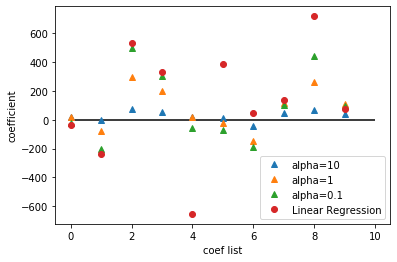

In [33]:
plt.plot(rdg10.coef_, '^',label = 'alpha=10')
plt.plot(rdg.coef_, '^',label = 'alpha=1')
plt.plot(rdg01.coef_, '^',label = 'alpha=0.1')
plt.plot(lr.coef_, 'o',label = 'Linear Regression')
plt.xlabel('coef list')
plt.ylabel('coefficient')
plt.hlines(0,0,len(lr.coef_))
plt.legend()
plt.show()

- .coef_는 모델에 사용된 각 feature의 가중치 벡터 값이다.
- .intercept_는 현재 모델에 사용된 상수항 값이다.
- W0X0 * W2X2 * .... * W9X9 + b = 예측값
 - X : feature, 컬럼 , datasets.load_diabetes().feature_names
 - W : 가중치 벡터 값 , coef_
 - b : 상수항 값, intercept_

In [81]:
rdg.coef_

array([  19.1162403 ,  -79.43124284,  299.82141058,  196.81079095,
         15.81513743,  -23.2119793 , -146.05882051,  114.93986475,
        259.31700719,  112.13034018])

In [75]:
rdg.intercept_

151.03704883004517

In [182]:
# W0X0 * W2X2 * .... * W9X9 + b
((X_test[0])*rdg10.coef_).sum() + rdg10.intercept_

163.90764858572987

In [177]:
rdg10.predict([X_test[0]])

array([163.90764859])

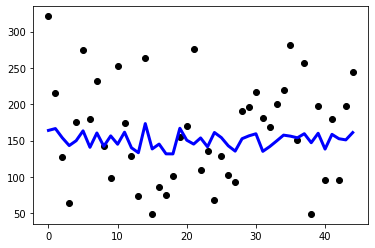

In [155]:
plt.scatter(range(len(X_test)), y_test , color='k')
plt.plot(range(len(X_test)), rdg10.predict(X_test), color = 'b', linewidth=3)
plt.show()

In [181]:
datasets.load_diabetes().feature_names

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

## Lasso
- Ridgedml eodks
- Ridge와 마찬가지로 모든 계수를 0에 가깝게 만듦
- 규제 방식에 차이가 있음 --> L1 규제라 명명
- 어떤 계수값은 0으로 산출 --> 완전 제외

In [183]:
from sklearn.linear_model import Lasso

In [184]:
X = diab.data
y= diab.target

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.1, random_state=0)

In [186]:
lss = Lasso()
lss.fit(X_train, y_train)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [204]:
print('train data accuracy: {:.3f}'.format(lss.score(X_train, y_train)))
print('test data accuracy: {:.3f}'.format(lss.score(X_test, y_test)))
print('사용한 특성의 수: {}'.format(np.sum(lss.coef_!=0)))

train data accuracy: 0.378
test data accuracy: 0.231
사용한 특성의 수: 3


In [205]:
lss10 = Lasso(alpha=10)
lss10.fit(X_train, y_train)
print('train data accuracy: {:.3f}'.format(lss10.score(X_train, y_train)))
print('test data accuracy: {:.3f}'.format(lss10.score(X_test, y_test)))
print('사용한 특성의 수: {}'.format(np.sum(lss10.coef_!=0)))

train data accuracy: 0.000
test data accuracy: -0.038
사용한 특성의 수: 0


In [210]:
lss001 = Lasso(alpha=0.01)
lss001.fit(X_train, y_train)
print('train data accuracy: {:.3f}'.format(lss001.score(X_train, y_train)))
print('test data accuracy: {:.3f}'.format(lss001.score(X_test, y_test)))
print('사용한 특성의 수: {}'.format(np.sum(lss001.coef_!=0)))

train data accuracy: 0.529
test data accuracy: 0.348
사용한 특성의 수: 10
